# Content
- Get Data
- Initial Exploratory Analysis
    - Find duplicates 
    - Descriptive Statistics Analysis
    - Decide on categorical features encoding
    - Decide on the imputation of missing values
    - Gain insights from plots
- Next Steps

# Get Data

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Ensure plots are displayed in the notebook
%matplotlib inline

In [57]:
# Load the dataset
df = pd.read_csv('train.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [44]:
df.shape

(8068, 11)

# Initial Exploratory Analysis

### Find duplicaters

In [125]:
# Check for duplicate rows based on all columns except 'ID'
duplicate_rows = df[df.duplicated(subset=df.columns.difference(['ID']))]

# Count the number of duplicate rows
num_duplicate_rows = len(duplicate_rows)

print("Number of duplicate rows in the dataset (excluding 'ID' column):", num_duplicate_rows)


Number of duplicate rows in the dataset (excluding 'ID' column): 417
Duplicate rows in the dataset:
          ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
319   459768    Male           No   19        No  Healthcare              0.0   
617   461385    Male          Yes   85        No      Lawyer              NaN   
809   465024    Male          Yes   52       Yes   Executive              0.0   
836   467826    Male           No   18        No  Healthcare              0.0   
841   460385    Male           No   31       Yes  Healthcare              0.0   
...      ...     ...          ...  ...       ...         ...              ...   
8000  462851    Male           No   19        No  Healthcare              0.0   
8014  461489  Female          Yes   70       Yes      Lawyer              1.0   
8042  465422  Female          Yes   40       Yes      Artist              1.0   
8055  461291    Male           No   18        No  Healthcare              0.0   
8065  465

### Drop Duplicates

In [141]:
# Drop duplicate rows based on all columns except 'ID'
df = df.drop_duplicates(subset=df.columns.difference(['ID']), keep='first')

# Print the number of rows after dropping duplicates
print("Number of rows after dropping duplicates:", len(df))

df.to_csv('df_without_duplicates.csv', index=False)
print('File exported')

Number of rows after dropping duplicates: 7651
File exported


### Descriptive Statistics Analysis

The following table provides a summary of the central tendency, dispersion (range, variance, and standard deviation), and shape of the dataset’s distribution:

In [130]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,7651.000000,7651.000000,6845.000000,7319.000000
mean,463484.138283,43.584368,2.728415,2.852712
std,2588.327172,16.525300,3.449225,1.549283
min,458982.000000,18.000000,0.000000,1.000000
25%,461242.500000,31.000000,0.000000,2.000000
50%,463482.000000,40.000000,1.000000,3.000000
75%,465741.500000,53.000000,5.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


The dataset covers a wide range of ages, with a substantial portion of individuals being middle-aged.
There is a notable number of individuals with little to no work experience.
Family sizes are typically between 2 and 4 members, with some larger families present.
The data contains a considerable amount of variability, particularly in work experience and family size.

### Decide on categorical features encoding

Let's check unique values.
It will be more clear which encoding technique to apply

In [132]:
# List of columns to get unique values for
columns_to_check = ['Family_Size', 'Age', 'Work_Experience', 'Gender', 'Profession', 'Spending_Score', 'Var_1', 'Ever_Married', 'Graduated']

# Loop through the columns and print unique values
for column in columns_to_check:
    unique_values = df[column].dropna().unique()
    unique_values.sort()
    print(f"\nUnique values for {column}:", unique_values)


Unique values for Family_Size: [1. 2. 3. 4. 5. 6. 7. 8. 9.]

Unique values for Age: [18 19 20 21 22 23 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43
 45 46 47 48 49 50 51 52 53 55 56 57 58 59 60 61 62 63 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]

Unique values for Work_Experience: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]

Unique values for Gender: ['Female' 'Male']

Unique values for Profession: ['Artist' 'Doctor' 'Engineer' 'Entertainment' 'Executive' 'Healthcare'
 'Homemaker' 'Lawyer' 'Marketing']

Unique values for Spending_Score: ['Average' 'High' 'Low']

Unique values for Var_1: ['Cat_1' 'Cat_2' 'Cat_3' 'Cat_4' 'Cat_5' 'Cat_6' 'Cat_7']

Unique values for Ever_Married: ['No' 'Yes']

Unique values for Graduated: ['No' 'Yes']


- **One-hot encoding** will be applied for Gender, Profession, Ever_Married, Graduated as they are nominal variables with distinct categories
- **One-hot encoding** will be applied for Var_1 (we don't have specific information on what each category in Var_1 represents, so treating them as nominal categories and applying one-hot encoding is the correct approach as well).
- **Ordinary encoding** will be applied for Spending_Score: 'Average'-2, 'High'-1 'Low'-3

### Decide on imputation of missing values

In [134]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data_percentage = missing_data / len(df) * 100
missing_data_table = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage})
missing_data_table

,Missing Values,Percentage
Ever_Married,140,1.829826
Graduated,78,1.019475
Profession,124,1.620703
Work_Experience,806,10.534571
Family_Size,332,4.339302
Var_1,76,0.993334


- **Categorical Columns with Small Number of Missing Values**:

- Ever_Married (140 missing values)
- Graduated (78 missing values)
- Profession (124 missing values)
- Var_1 (76 missing values)

For these categorical columns, where the number of missing values is relatively small compared to the dataset size, **mode imputation** (most frequent value) is a suitable approach. This approach maintains the categorical nature of the data and is less likely to introduce bias.

- **Numerical Columns with Moderate Missing Values**:

- Work_Experience (806 missing values)
- Family_Size (332 missing values)

For numerical columns, **mean imputation** is appropriate as it preserves the central tendency of the data. This approach is simple and effective for columns with a moderate amount of missing data.


### Gain insights from plots

Goal at this stage:
- checking whether the data set is balanced or imbalanced
- Double confirming the above decision about missing values imputation

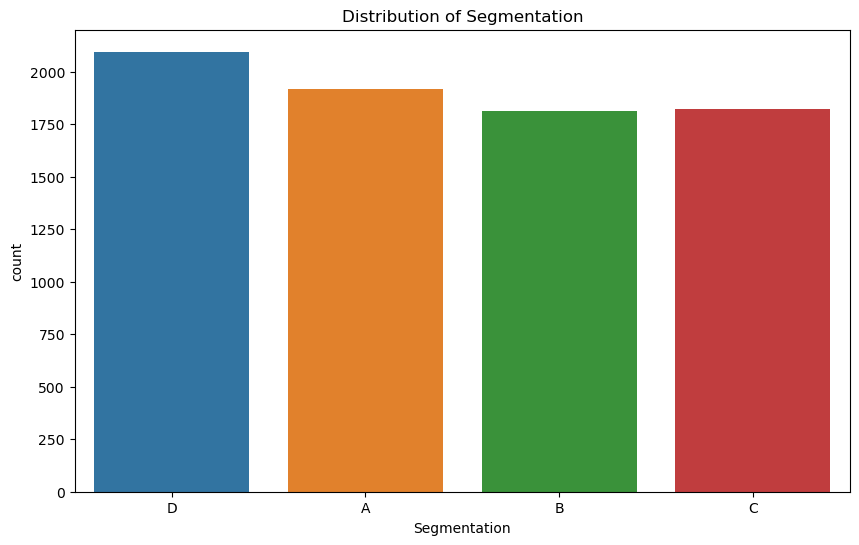

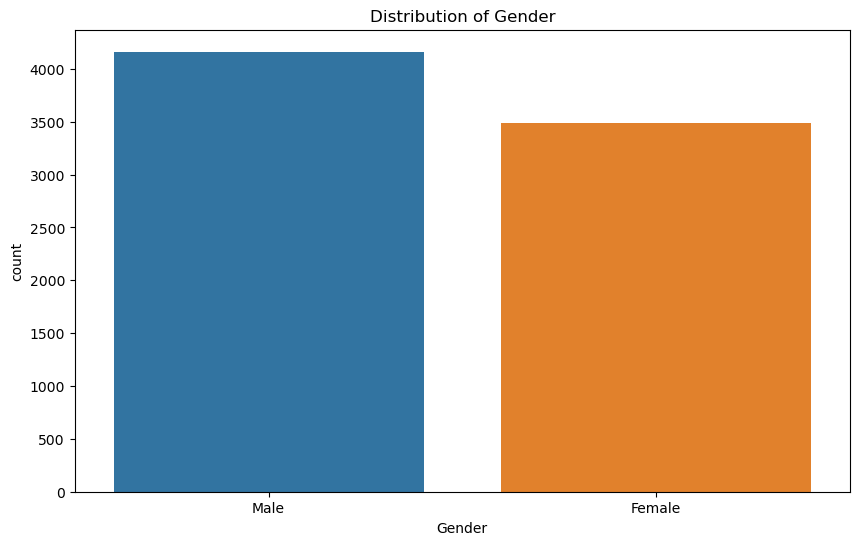

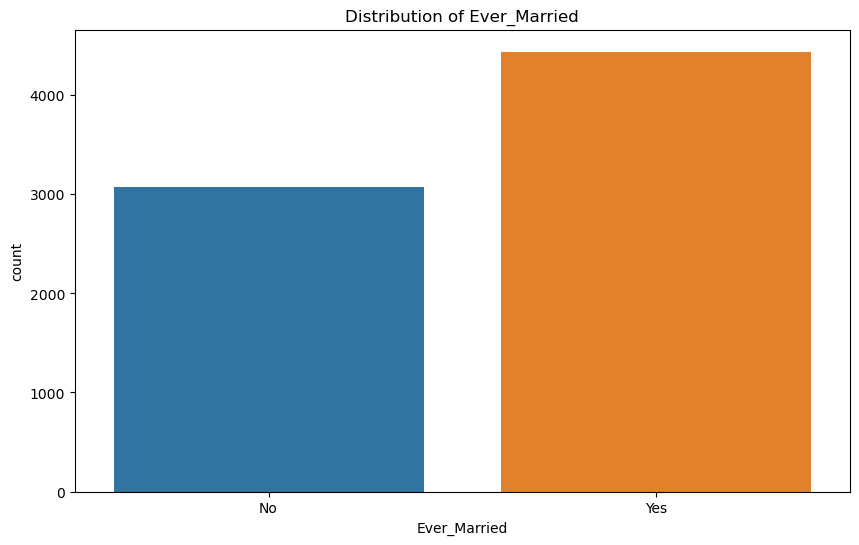

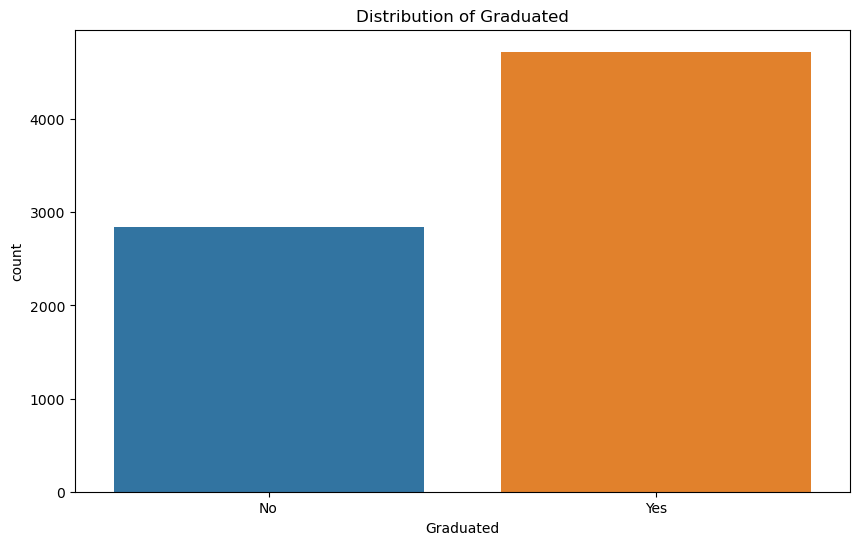

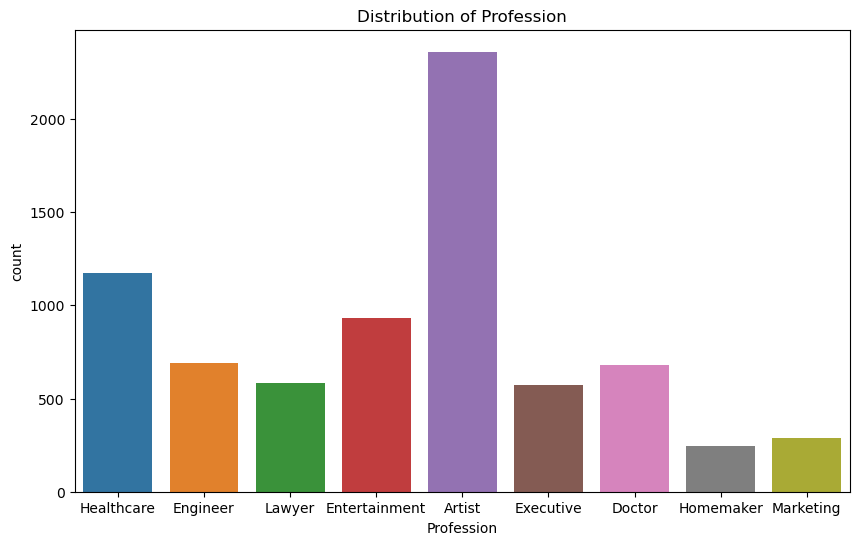

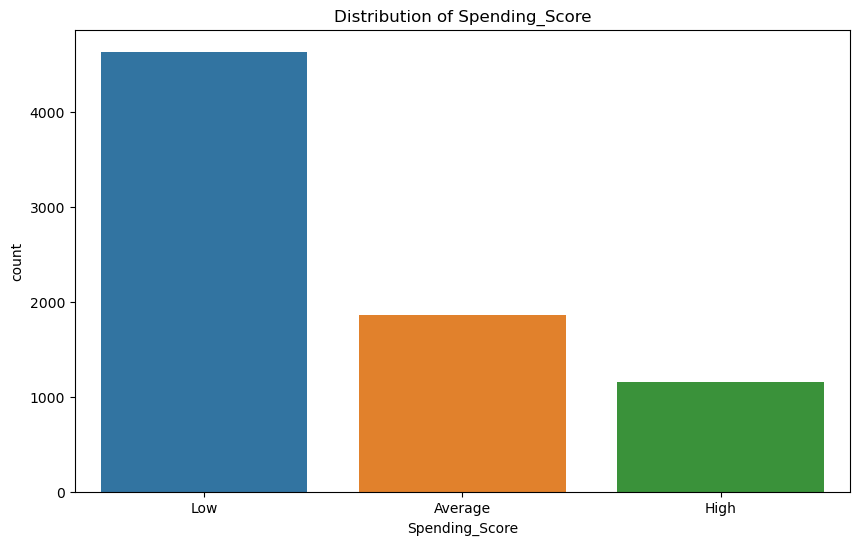

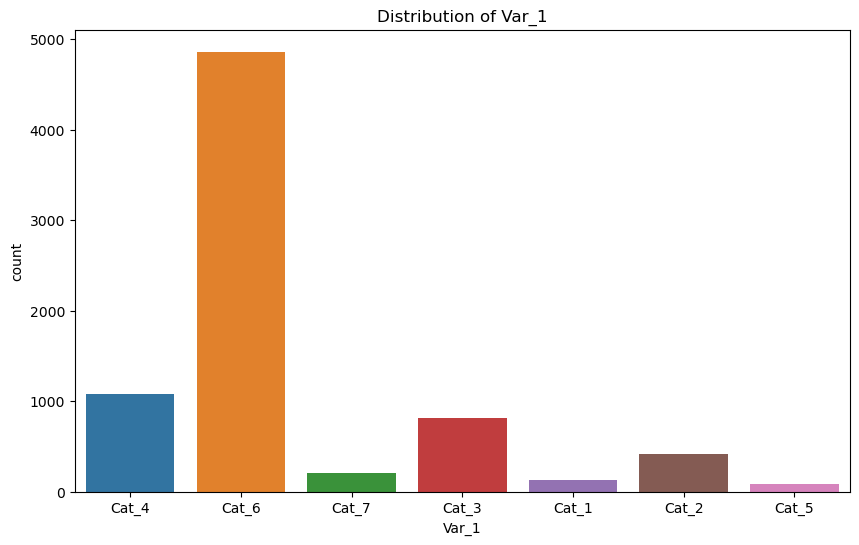

C:\Users\dziya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


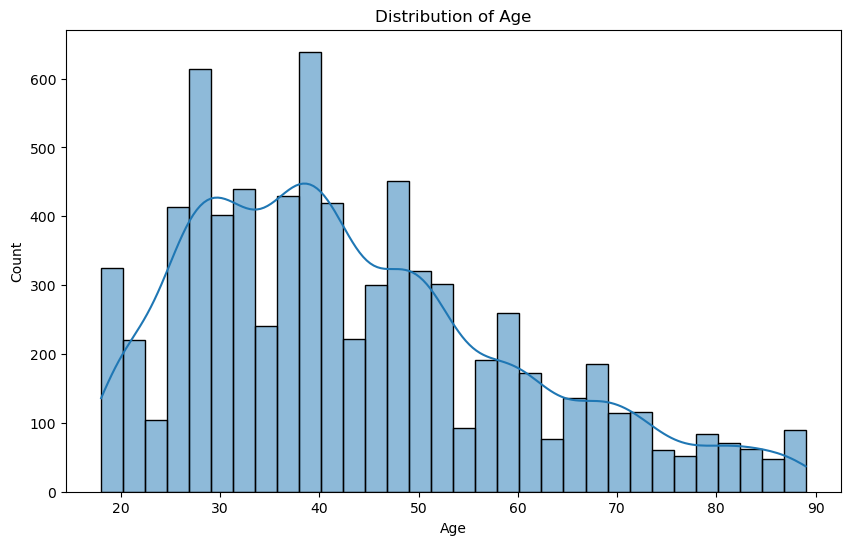

C:\Users\dziya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


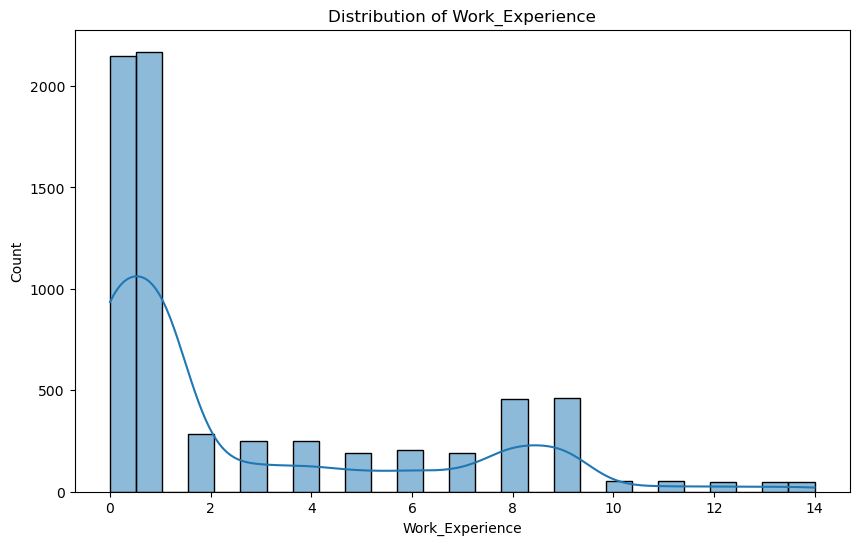

C:\Users\dziya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


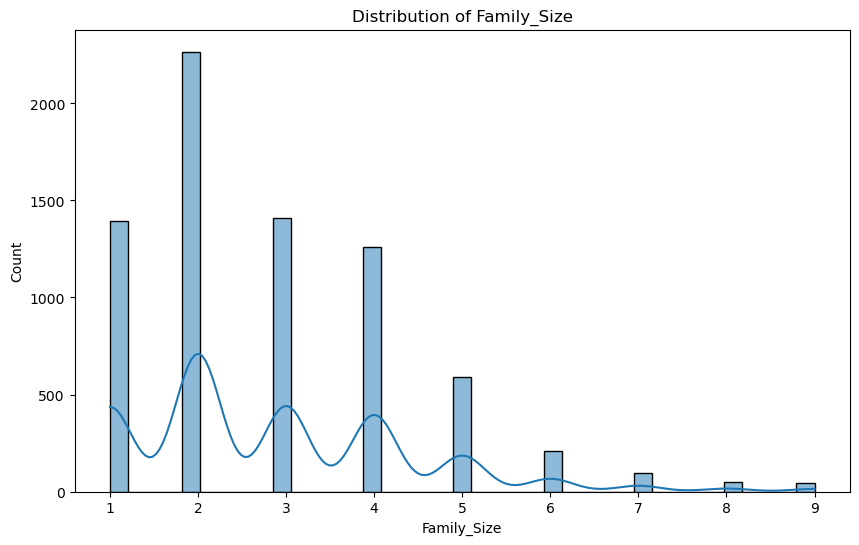

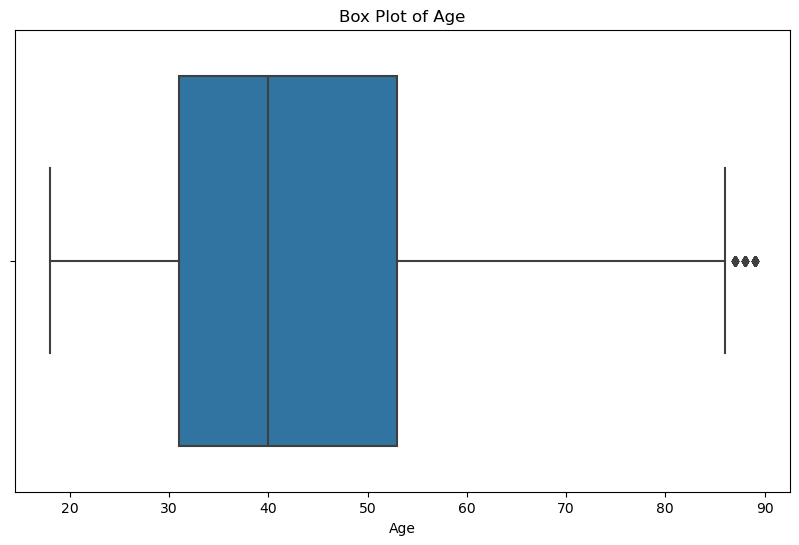

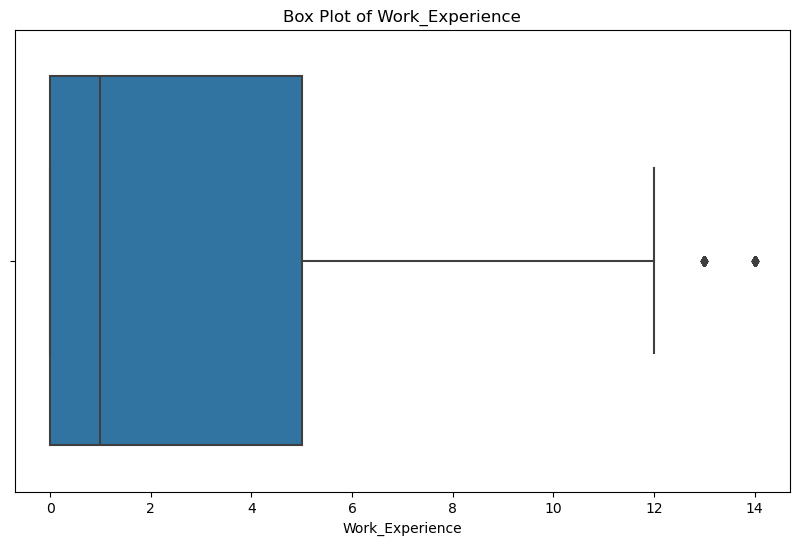

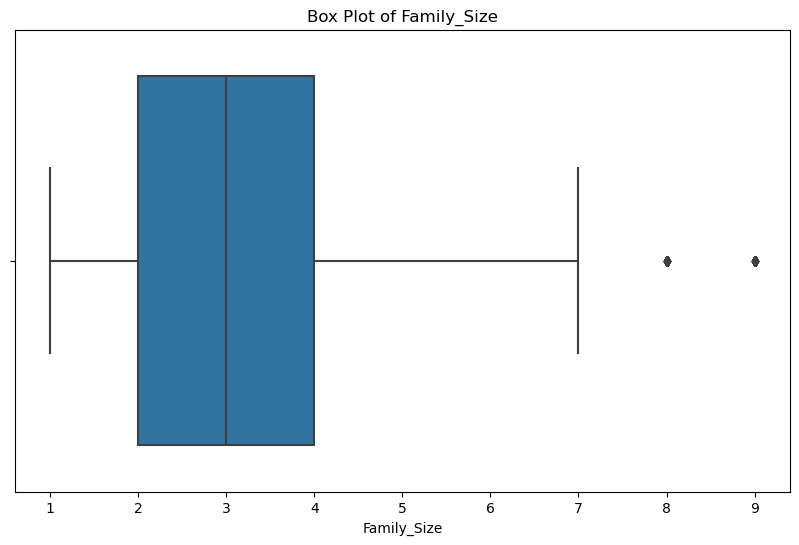

In [139]:
# Plot count plot for the target variable 'Segmentation'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Segmentation')
plt.title('Distribution of Segmentation')
plt.show()

# List of categorical columns
categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

# Plot count plots for each categorical variable
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.show()

# List of numerical columns
numerical_columns = ['Age', 'Work_Experience', 'Family_Size']

# Plot histograms for each numerical variable
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Plot box plots for each numerical variable
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot of {column}')
    plt.show()


- If only the features are imbalanced and not the target, we may proceed with a regular split but afterwards ensure that both sets are representative of the complete dataset.
- **Median Imputation**
    - *Work_Experience* data is skewed towards lower values with a significant number of zeros and ones.
Median Imputation is recommended for handling missing values in Work_Experience to reduce the influence of less frequent higher values.
    - *Family_Size* shows a skewed distribution with most values between 1 and 4, and fewer larger values.
Median Imputation is preferred for handling missing values in Family_Size, as it is less influenced by outliers and skewed data.
- **Imputing with a constant value Unknown**
    - In *Profession* one category is already overwhelmingly dominant, hence imputing with a constant value like *Unknown* can be a better choice
- **Mode imputation**
    - In *Var_1* one category is already overwhelmingly dominant, however, there are 0.94% of missing values, hence mode imputation is still fine

# Next Steps

**Next Steps**
- Split Data to train_split and test_split (regular split, but not stratify)
- Compare distributions of imbalanced features in train_split and test_split
- Imputation of missing values:
    - **mode** imputation (Ever_Married, Graduated,  Var_1)
    - Imputing with a **constant** value like *Unknown* (Profession)
    - **median** imputation (Work_Experience, Family_Size)
- Categorical features encoding:
    - **One-hot encoding** will be applied for Gender, Profession, Ever_Married, Graduated as they are nominal variables with distinct categories
    - One-hot encoding will be applied for Var_1 (we do not have specific information on what each category in Var_1 represents, so treating them as nominal categories and applying one-hot encoding is the correct approach as well).
    - **Ordinary encoding** will be applied for Spending_Score: 'Average'-2, 'High'-1 'Low'-3